In [59]:
import numpy as np
from sklearn.datasets import load_boston
import sys
sys.path.append('../algorithms')
from LinearModels.ridge_regression import RidgeRegression
sys.path.append('..')
from utils import standardize

In [5]:
boston = load_boston()
X      = boston.data
y      = boston.target

In [29]:
X = standardize(X)

In [6]:
import matplotlib.pyplot as plt

The following shows the path of each variable coefficient as a function of regularization strength.

(4.466835921509644e-05,
 2238.7211385683377,
 -7.1699427747377e+44,
 6.623826961246495e+44)

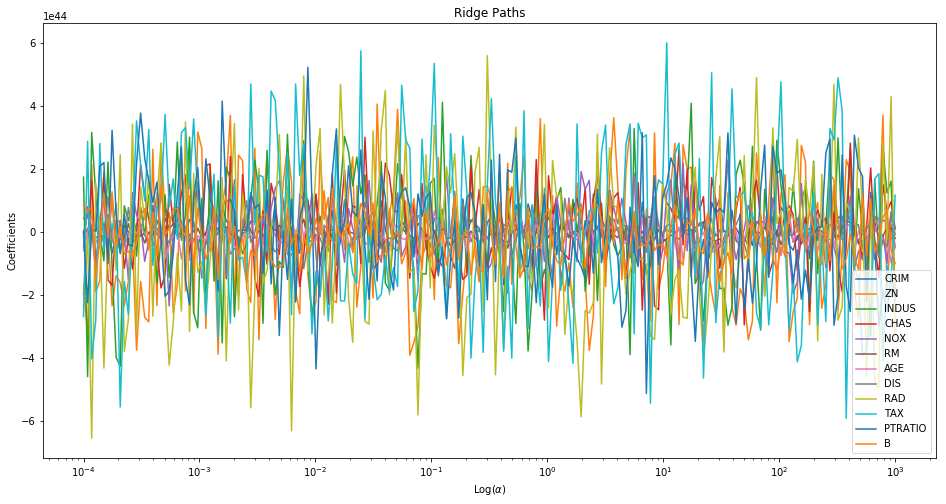

In [69]:
# Initialize variables
alpha_list = []
alphas     = np.logspace(-4,3,200) #Range of lambda values

#Run lasso regression for each lambda
for alpha in alphas:
     ridge = RidgeRegression(alpha=alpha, gd=True, eta=.01, n_iter=100)
     ridge.fit(X, y)
     alpha_list.append(ridge.w[1:])

#Stack into numpy array
alpha_stack = np.stack(alpha_list).T

#Plot results
n, _ = alpha_stack[1:].shape
plt.figure(figsize = (16,8))

for i in range(n):
    plt.plot(alphas, alpha_stack[i], label = boston.feature_names[i])

plt.xscale('log')
plt.xlabel('Log($\\alpha$)')
plt.ylabel('Coefficients')
plt.title('Ridge Paths')
plt.legend()
plt.axis('tight')

In [248]:
ridge = RidgeRegression(alpha=10, eta=0.001, n_iter=13500)
ridge.fit(X, y)

In [249]:
ridge.w

array([22.53280632, -0.85937094,  0.96618232, -0.15587398,  0.72361232,
       -1.93985639,  2.77431213, -0.03663881, -3.1286371 ,  1.9214894 ,
       -1.2182996 , -2.0421724 ,  0.86467334, -3.79943744])

In [253]:
from sklearn.linear_model import Ridge

In [254]:
ridge = Ridge(alpha=10)

In [255]:
ridge.fit(X, y)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [256]:
ridge.coef_

array([-0.85905074,  0.95497477, -0.04132656,  0.70777968, -1.81261091,
        2.74234394, -0.03238278, -2.85675627,  2.0978234 , -1.56539453,
       -1.98775121,  0.84470905, -3.62394181])

In [146]:
ridge = RidgeRegression(alpha=100, eta=0.001, n_iter=1398)
ridge.fit(X, y)

In [147]:
ridge.w

array([22.53280632, -0.69095922,  0.44136475, -0.51383851,  0.88579819,
       -0.49284133,  3.18475621, -0.15143732, -1.24615084,  0.28485817,
       -0.41791846, -1.6659169 ,  0.8658308 , -2.90440719])

In [148]:
np.sum(np.abs(ridge.w[1:]))

13.74607788342273

In [142]:
ridge = RidgeRegression(alpha=1000, eta=0.0001, n_iter=2112)
ridge.fit(X, y)

In [143]:
ridge.w

array([22.53280632, -0.23263119,  0.4782926 , -0.53207295,  0.42184775,
       -0.27782933,  1.40159357, -0.46945713,  0.05591414, -0.42282827,
       -0.66635398, -0.70939273,  0.57314146, -1.35698159])

In [144]:
np.sum(np.abs(ridge.w[1:]))

7.598336681655278

In [134]:
ridge = RidgeRegression(alpha=10000, eta=0.0001, n_iter=223)
ridge.fit(X, y)

In [135]:
ridge.w

array([22.53259529,  0.12612148,  0.15505441, -0.23826011, -0.23489592,
       -0.06222926,  0.15868206, -0.03864749, -0.10745678, -0.07195856,
       -0.0614122 , -0.16358672, -0.09215575, -0.35363743])

In [140]:
np.sum(np.abs(ridge.w[1:]))

1.8640981711117766

In [173]:
ridge = RidgeRegression(alpha=100000, eta=0.00001, n_iter=323)
ridge.fit(X, y)

In [174]:
ridge.w

array([ 1.81594346e+01, -7.77749145e-02,  2.46105276e-04,  2.25502826e-02,
       -1.36631155e-02,  9.23226033e-02, -2.74433915e-01, -2.10612622e-01,
       -1.15662395e-01, -3.52461025e-01, -3.96951156e-02, -1.55518975e-01,
       -8.41206438e-02, -2.45885119e-01])

In [175]:
np.sum(np.abs(ridge.w[1:]))

1.684946832047384

In [176]:
min(ridge.cost_)

43247.634516670965

In [177]:
ridge.cost_[-10:]

[43362.19550115869,
 43376.62882915011,
 43391.88979900599,
 43407.97403418708,
 43424.87721825859,
 43442.59509434669,
 43461.12346460065,
 43480.45818966071,
 43500.59518813151,
 43521.53043606119]

In [178]:
ridge.cost_.index(min(ridge.cost_))

297

In [186]:
ridge.w[9]

-0.3524610253417147